(100, 1)


array([[ 0.08758696],
       [-0.09074278]])

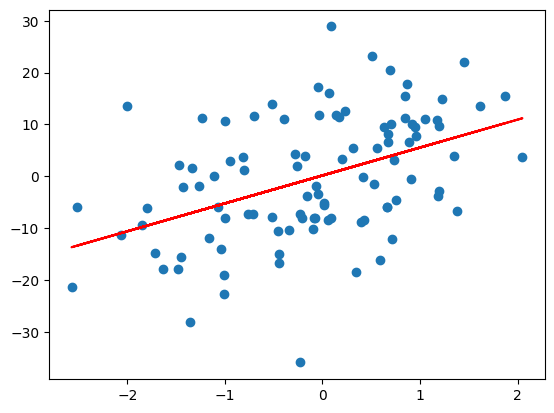

In [5]:
import numpy as np
#make_regression pour créer un dataset : ensemble de données

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# n_samples : nombre de lignes
# n_features : nombre de variables = 1 puisque seuleument x
# c'est donc creer deux listes x et y contenant chacune 100 valeurs
x, y = make_regression(n_samples= 100 , n_features=1, noise=10)

#tracer le graphe en points de x en fonction de y
#plt.scatter(x,y)


#redimensionner y
y = y.reshape(y.shape[0],1)
print(y.shape)

# matrice X
# hstack permet de coller ensemble deux vecteurs un à coté de l'autre
# npones permet de créer une matrice ayant valeur 1 et de taille que l'on ecrit en argument

X = np.hstack((x,np.ones(x.shape)))
X.shape

theta = np.random.randn(2,1)
#theta

# ceration du model f
def model(X,theta):
  return X.dot(theta)


# creation du cout

def cost_function(X,y,theta):
  m=len(y)
  return (1/(2*m)) * np.sum((model(X,theta)-y)**2)

def grad(X,y,theta):
  m=len(y)
  return (1/m )* X.T.dot(model(X,theta) - y)

# creation du gradient descendant pour varier theta

def grad_desc(X,y,theta,lr,n_iter):
  #initialiser avec des valeurs nulles
  cost_hist = np.zeros(n_iter)
  for i in range(0,n_iter):
    theta = theta - lr * grad(X,y,theta)
    cost_hist[i] = cost_function(X,y,theta)

  return theta , cost_hist


cost_function(X,y,theta)
theta_final,cost_hist = grad_desc(X,y,theta,lr=0.01,n_iter=1000)

# prediction est le modele obtenu fianl de theta qui contient a et b
predictions = model (X,theta_final)
#predictions
plt.scatter(x,y)
plt.plot(x,predictions,c='r')

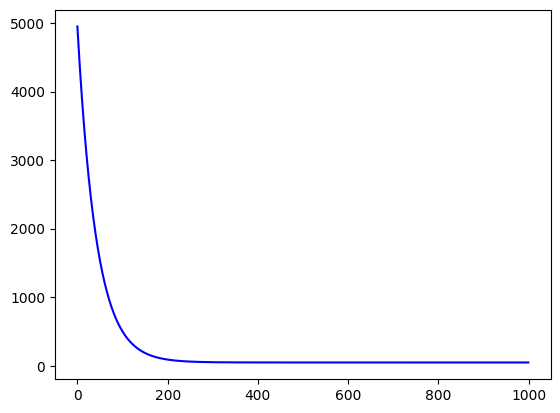

In [ ]:
# on va tracer la courbe d'apprentissage cost en fonction d'iteration  sur 1000 valeurs
plt.plot(range(1000),cost_hist,c='b')